# Statistics Tutorial - Lesson 6
# Probability Distribution

A [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution) is a mathemtical function to describe all the possible values and likelihoods that a random variable can take within a given range.

A probability distribution can be defined by its [Probability Density Function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF). PDF is used to define the random variable's probability coming within a distinct range of values. On the other hands, a probability distribution can often be represented by a [Cumulative Distribution Function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF). CDF accumulates all of the probability less than or equal to x, i.e.
$$ CDF(x) = PDF(X \le x) = \sum_{i=min}^{x} PDF(i) $$

There are various probability distributions such as 
- Normal Distribution. It is the most commonly used continuous distribution for linear growth such as errors, offsets, etc.
- Binomial Distribution. For the number of "positive occurrences" given a fixed total number of independent occurrences.
- Geometric Distribution. For binomial-type observations but where the quantity of interest is the number of failures before the first success.
- Poisson distribution. For the number of occurrences of an event that occurs independently with a given rate in a given period of time.

In [1]:
###
# This example shows random variables to be represented by a histogram
# , which visually demonstrate its estimated probability density function.
###
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm
from math import floor, ceil

# generate a sample
sample = normal(loc=50, scale=5, size=1000)

# calculate parameters
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean={:.3f}, Standard Deviation={:.3f}'.format(sample_mean, sample_std))

Mean=49.949, Standard Deviation=4.863


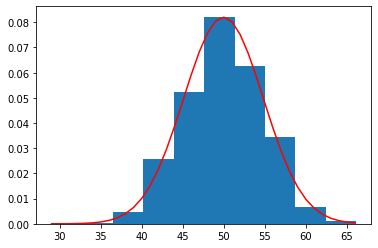

In [2]:
# define the distribution function
dist = norm(sample_mean, sample_std)

# sample probabilities for a range of outcomes
values = [value for value in range(floor(min(sample)), ceil(max(sample)))]
probabilities = [dist.pdf(value) for value in values]

# plot the histogram and pdf
pyplot.hist(sample, bins=10, density=True)
pyplot.plot(values, probabilities, c='r')
pyplot.show()

## Normal Distribution

[Normal Distrbution](https://en.wikipedia.org/wiki/Normal_distribution) or called Gaussian distribution is the most important in statistics. It is often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. It is defined as:

$$ PDF = \mathcal{N}(\mu, \sigma^{2}) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}} $$

$$ CDF = \phi(x) = \frac{1}{2}(1 + erf(\frac{x-\mu}{\sigma\sqrt{2}})) $$
where erf is called [Error Function](https://en.wikipedia.org/wiki/Error_function), which is defined as 

$$ erf(z) = \frac{2}{\sqrt{\pi}}\int_{0}^{z}e^{-x^{2}}dx $$

In [3]:
# Example 1
import math

def get_nd_pdf(mean, std, x):
    """
    Calculate Normal Distribution PDF
    """
    return math.exp(-(((x-mean)**2)/(2 * std**2))) / (std * math.sqrt(2*math.pi))

def get_nd_cdf(mean, std, x):
    """
    Calculate Normal Distribution CDF
    """
    return 0.5 * (1 + math.erf((x - mean) / (std * math.sqrt(2))))

# Example:
# There is a normal distribution with mean of 20 and standard deviation of 2
nd_mean = 20
nd_std = 2

# Now we are checking x = 21
# then calculate a probability when x = 21
x = 21
prb_case1 = get_nd_pdf(nd_mean, nd_std, x)
# We can calculate the probability when 20 <= x <= 22
x1 = 20
x2 = 22
prb_case2 = get_nd_cdf(nd_mean, nd_std, x2) - get_nd_cdf(nd_mean, nd_std, x1)
                                      
# Print results
print('Case 1: Probability(x={x}) = {p:.3f}'.format(x=x, p=prb_case1))
print('Case 2: Probability({x1} <= x <= {x2}) = {p:.3f}'.format(x1=x1, x2=x2, p=prb_case2))

Case 1: Probability(x=21) = 0.176
Case 2: Probability(20 <= x <= 22) = 0.341


In [4]:
# Example 2
# by SciPy
from scipy.stats import norm
prb_case1 = norm.pdf(x, loc=nd_mean, scale=nd_std)
prb_case2 = norm.cdf(x2, loc=nd_mean, scale=nd_std) - norm.cdf(x1, loc=nd_mean, scale=nd_std)
# Print results
print('Case 1: Probability(x={x}) = {p:.3f}'.format(x=x, p=prb_case1))
print('Case 2: Probability({x1} <= x <= {x2}) = {p:.3f}'.format(x1=x1, x2=x2, p=prb_case2))

Case 1: Probability(x=21) = 0.176
Case 2: Probability(20 <= x <= 22) = 0.341


## Central Limit Theorem

One of importances of Normal Distribution is [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) (CLT). It states that for a large enough samples, the distribution of the sample mean will approach normal distribution. This holds for a sample of independent random variables from any distribution with a finite standard deviation.

In [5]:
# Example
import math

# We have a sample of 100 values from a population with mean = 500, standard deviation = 80
# We are asked to calculate a lower bound L and an upper bound U when probability of X between L and U is 95%
# where z-score is 1.96
sample_size = 100
mean = 500
std = 80
prob = 0.95
z_score = 1.96

# Calculation
lower_bound = mean - (std/math.sqrt(sample_size)) * z_score
upper_bound = mean + (std/math.sqrt(sample_size)) * z_score

# Print result
print('P({l:.3f} <= x <= {u:.3f}) = {p}'.format(l=lower_bound, u=upper_bound, p=prob))

P(484.320 <= x <= 515.680) = 0.95
